In [1]:
from matplotlib import pyplot as plt
import numpy as np 
import math
import matplotlib.pyplot as plt
from helper import *
from solution import *

In [181]:
dataloc = '../data/train.txt'
train_df = load_data(dataloc)
print("Dataset shape: ", train_df.shape)

Dataset shape:  (1561, 257)


In [180]:
dataloc = '../data/test.txt'
test_df = load_data(dataloc)
print("Dataset shape: ", test_df.shape)

Dataset shape:  (424, 257)


In [81]:
def get_X_y(df):
    observations_range = df[:].shape[0]

    label = []
    sys = []
    intense = []

    for i in range(observations_range):

        input_extract_features = df[:, 1:][i]
        sys_intense = extract_feature(input_extract_features)

        sys_temp = sys_intense[0]
        intense_temp = sys_intense[1]
        label_temp = df[:,0][i]

        sys.append(sys_temp)
        intense.append(intense_temp)
        label.append(label_temp)
        
        X = np.column_stack((sys, intense))
        y = np.array(label)
        
    return X, y

In [82]:
X_train, y_train = get_X_y(train_df)
X_test, y_test = get_X_y(test_df)

In [83]:
y_train.shape

(1561,)

In [84]:
y_train = np.where(y_train == 5, -1, 1)
y_train

array([-1,  1,  1, ...,  1,  1,  1])

In [85]:
X_train

array([[-0.53372656, -0.11173828],
       [-0.1174375 , -0.75391406],
       [-0.16229688, -0.77228125],
       ...,
       [-0.21638281, -0.60979297],
       [-0.09282031, -0.66230859],
       [-0.13085156, -0.44755859]])

In [86]:
X_test.shape[1]



2

In [87]:
np.insert(X_test, 0, 1, axis=1).shape

(424, 3)

In [185]:
class Perceptron(object):
    
    def __init__(self, max_iter):
        self.max_iter = max_iter
        self.W = None 

    def fit(self, X, y):
        """Train perceptron model on data (X,y).

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            self: Returns an instance of self.
        """

        # Parameters
        max_iter = self.max_iter
        self.W = np.zeros(X.shape[1] + 1)
        
        
        for _ in range(max_iter):
            
#             print(self.W)
            
            for xi, target in zip(X, y):
                
                
                xi = np.insert(xi, 0, 1, axis=0)

                prediction = np.dot(xi, self.W)
                prediction_sign = np.where(prediction >= 0.0, 1, -1)
#                 print("xi: ", xi, " W: ", self.W, " prediction: ", prediction, " prediction_sign: ", prediction_sign)
    
                self.W += (target - prediction_sign) * xi


        # After implementation, assign your weights w to self as below:
        # self.W = w
        
        return self
    
    
    def predict(self, X):
        """Predict class labels for samples in X.

        Args:
            X: An array of shape [n_samples, n_features].

        Returns:
            preds: An array of shape [n_samples,]. Only contains 1 or -1.
        """

        X = np.insert(X, 0, 1, axis=1)
        prediction = np.dot(X, self.W)
        prediction_sign = np.where(prediction >= 0.0, 1, -1)

        return prediction_sign
    
    def get_params(self):
        """Get parameters for this perceptron model.

        Returns:
            W: An array of shape [n_features,].
        """
        if self.W is None:
            print("Run fit first!")
            sys.exit(-1)
            
        return self.W
    
    def show_result(X, y, W, save=True):
        
        """Plot the linear model after training. 
           You can call show_features with 'save' being False for convenience.

        Args:
            X: An array of shape [n_samples, 2].
            y: An array of shape [n_samples,]. Only contains 1 or -1.
            W: An array of shape [n_features,].

        Returns:
            Do not return any arguments. Save the plot to 'result.*' and include it
            in your report.
            """
    
        # Creating a scatter plot
        plt.figure(figsize=(8, 5))

        for i in range(len(X)):
            if y[i] == 1.0:
                plt.scatter(X[i, 0], X[i, 1], c='r', marker='*', label='Label 1' if (i==0 or i==1) else "")

            elif y[i] == -1.0:
                plt.scatter(X[i, 0], X[i, 1], c='b', marker='+', label='Label 5' if (i==0 or i==1) else "")


        # Plot the decision boundary
        x1_values = X[:,0]
        x2_values = - (W[1] / W[2]) * x1_values - (W[0] / W[2])
        plt.plot(x1_values, x2_values, label='Decision Boundary')

        # Set plot limits
        plt.xlim(min(X[:, 0]), max(X[:, 0]))
        plt.ylim(min(X[:, 1]), max(X[:, 1]))

        # Adding labels and title
        plt.xlabel('Sys')
        plt.ylabel('Intense')
        plt.title('Perceptron Results')
        plt.legend()
        
        if save==True:
            plt.savefig(f'2D_scatterplot_decision_b.png')
        else:
            pass
    
        plt.show()
        
    def score(self, X, y):
        """Returns the mean accuracy on the given test data and labels.

        Args:
            X: An array of shape [n_samples, n_features].
            y: An array of shape [n_samples,]. Only contains 1 or -1.

        Returns:
            score: An float. Mean accuracy of self.predict(X) wrt. y.
        """
        ### YOUR CODE HERE
        # Predict the class labels for the samples in X
        predictions = self.predict(X)

        # Compare predictions with the actual labels and calculate accuracy
        accuracy = np.mean(predictions == y)
        
        return accuracy
        ### END YOUR CODE

In [186]:
perceptron = Perceptron(max_iter=10)
perceptron.fit(X_train, y_train)

In [187]:
# Get the weights from the Perceptron model
W = perceptron.get_params()
W

array([ 6.        , 22.74534375, -2.50690625])

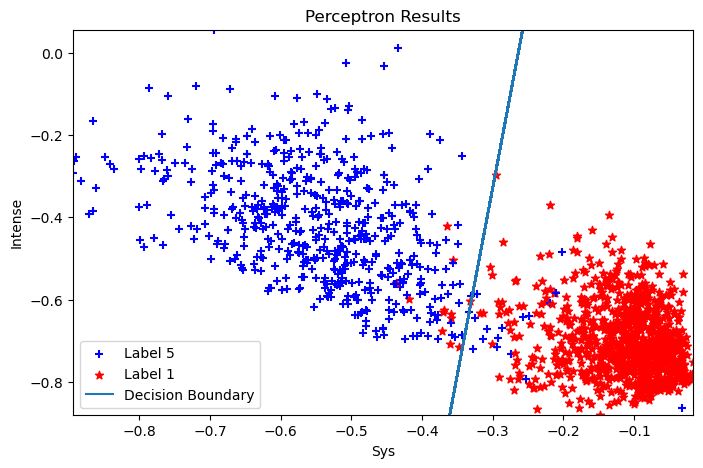

In [188]:
# Call the function with the training data and learned weights
Perceptron.show_result(X_train, y_train, W, save=True)


In [189]:
preds = perceptron.predict(X_test)
preds

array([ 1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1, -1,
        1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1, -1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1,
        1,  1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,  1, -1,
        1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1,
        1, -1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1, -1, -1, -1,  1,
        1,  1, -1, -1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1,
        1,  1, -1,  1,  1

In [190]:
# Evaluate the model's performance on the test data
accuracy = perceptron.score(X_test, y_test)
print("Model Accuracy on Test Data:", accuracy)

Model Accuracy on Test Data: 0.5943396226415094
